In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_blobs

In [109]:
data_X, data_y = make_blobs(1000, 2, 5)
print data_X.shape, data_y.shape

(1000, 2) (1000,)


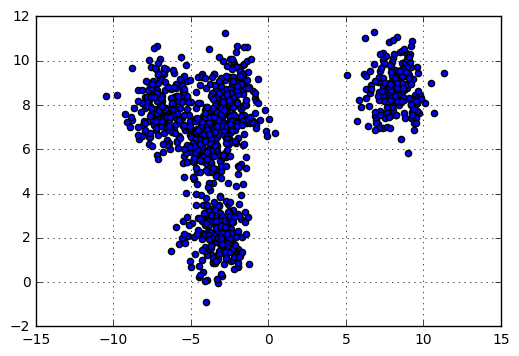

In [110]:
plt.figure(0)
plt.grid("on")
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [138]:
# Number of clusters
k = 5

# Generate random cluster centers
clusters = {}

colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']

for kx in range(k):
    cluster_id = kx
    points = []
    dim = data_X.shape[1]
    center = 10.0*(np.random.random((dim,))*2 - 1)
    color = colors[kx]
    clusters[cluster_id] = {
        'points': points,
        'center': center,
        'color': color
    }

print clusters

{0: {'color': 'red', 'points': [], 'center': array([2.59182437, 6.49969808])}, 1: {'color': 'green', 'points': [], 'center': array([-9.22125294,  5.75514462])}, 2: {'color': 'blue', 'points': [], 'center': array([-8.00372135,  4.80159962])}, 3: {'color': 'yellow', 'points': [], 'center': array([-9.73893138,  7.3176179 ])}, 4: {'color': 'cyan', 'points': [], 'center': array([ 1.68531444, -3.29922161])}}


In [139]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

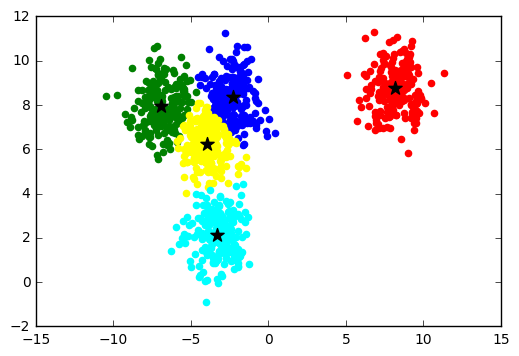

In [178]:
# Allocate points to clusters
for ix in range(data_X.shape[0]):
    # For each point, get distance with each cluster
    dist = []
    for kx in range(k):
        d = distance(data_X[ix], clusters[kx]['center'])
        dist.append(d)
    # Get cluster id where current point belongs
    c_id = np.argmin(dist)
    
    clusters[c_id]['points'].append(data_X[ix])

for kx in range(k):
    pts = np.asarray(clusters[kx]['points'])
    if pts.shape[0] > 0:
        # Compute new cluster center
        new_center = pts.mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['points'] = pts
    clusters[kx]['center'] = new_center

plt.figure(0)

for kx in range(k):
    cc = clusters[kx]['center']
    
    pts = clusters[kx]['points']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
    
    clusters[kx]['points'] = []
plt.show()

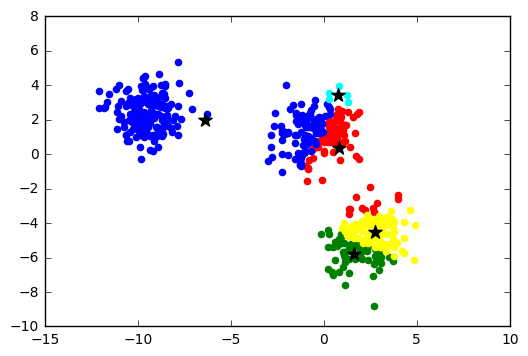